# Practice notebook for univariate analysis using NHANES data

This notebook will give you the opportunity to perform some univariate analyses on your own using the NHANES.  These analyses are similar to what was done in the week 2 NHANES case study notebook.

You can enter your code into the cells that say "enter your code here", and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar to code that appears in the case study notebook.  You will need to edit code from that notebook in small ways to adapt it to the prompts below.

To get started, we will use the same module imports and read the data in the same way as we did in the case study:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np

da = pd.read_csv("nhanes_2015_2016.csv")

## Question 1

Relabel the marital status variable [DMDMARTL](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDMARTL) to have brief but informative character labels.  Then construct a frequency table of these values for all people, then for women only, and for men only.  Then construct these three frequency tables using only people whose age is between 30 and 40.

In [2]:
da.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [3]:
da['DMDMARTL'].value_counts()

DMDMARTL
1.0     2780
5.0     1004
3.0      579
6.0      527
2.0      396
4.0      186
77.0       2
Name: count, dtype: int64

In [4]:
# insert your code here
da["DMDMARTL"] = da["DMDMARTL"].replace({
    1: "Married",
    2: "Widowed",
    3: "Divorced",
    4: "Separated",
    5: "Never married", 
    6: "Living with partner",
    77: "Refused",
    99: "Don't Know"
})

In [5]:
da['DMDMARTL'].head()

0                Married
1               Divorced
2                Married
3    Living with partner
4               Divorced
Name: DMDMARTL, dtype: object

In [6]:
x = da["DMDMARTL"].value_counts()
x / x.sum()

DMDMARTL
Married                0.507855
Never married          0.183412
Divorced               0.105773
Living with partner    0.096273
Widowed                0.072342
Separated              0.033979
Refused                0.000365
Name: count, dtype: float64

In [7]:
da["RIAGENDRx"] = da.RIAGENDR.replace({1: "Male", 2: "Female"})

In [8]:
da["RIAGENDRx"].head()

0      Male
1      Male
2      Male
3    Female
4    Female
Name: RIAGENDRx, dtype: object

In [9]:
x = da.loc[da["RIAGENDRx"] == "Male", "DMDMARTL"].value_counts()
x / x.sum()

DMDMARTL
Married                0.562881
Never married          0.184451
Living with partner    0.100991
Divorced               0.087271
Widowed                0.038110
Separated              0.025915
Refused                0.000381
Name: count, dtype: float64

In [10]:
x = da.loc[da["RIAGENDRx"] == "Female", "DMDMARTL"].value_counts()
x / x.sum()

DMDMARTL
Married                0.457193
Never married          0.182456
Divorced               0.122807
Widowed                0.103860
Living with partner    0.091930
Separated              0.041404
Refused                0.000351
Name: count, dtype: float64

/var/folders/4t/lhzjgp_j7ml02nfn_hhdv1mh0000gn/T/ipykernel_63958/2711234901.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(da["RIDAGEYR"])


<Axes: xlabel='RIDAGEYR', ylabel='Density'>

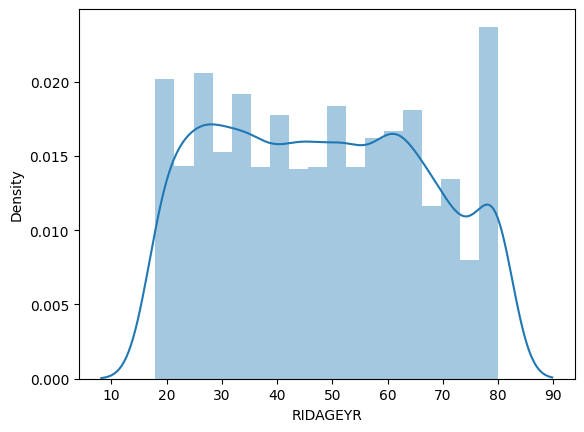

In [11]:
sns.distplot(da["RIDAGEYR"])

In [12]:
x = da.loc[(da["RIDAGEYR"] >= 30) & (da["RIDAGEYR"] <= 40), "DMDMARTL"].value_counts()
x / x.sum()

DMDMARTL
Married                0.545809
Never married          0.211501
Living with partner    0.139376
Divorced               0.068226
Separated              0.029240
Widowed                0.004873
Refused                0.000975
Name: count, dtype: float64

__Q1a.__ Briefly comment on some of the differences that you observe between the distribution of marital status between women and men, for people of all ages.

__Q1b.__ Briefly comment on the differences that you observe between the distribution of marital status states for women between the overall population, and for women between the ages of 30 and 40.

__Q1c.__ Repeat part b for the men.

## Question 2

Restricting to the female population, stratify the subjects into age bands no wider than ten years, and construct the distribution of marital status within each age band.  Within each age band, present the distribution in terms of proportions that must sum to 1.

In [13]:
# insert your code here
# [30 ~ 35), [35 ~ 40)
women = da.loc[da["RIAGENDRx"] == "Female"]
len(women)

2976

In [14]:
x = women.loc[(women["RIDAGEYR"] >= 30) & (women["RIDAGEYR"] < 35), "DMDMARTL"].value_counts()
x / x.sum()

DMDMARTL
Married                0.502024
Never married          0.259109
Living with partner    0.145749
Divorced               0.060729
Separated              0.032389
Name: count, dtype: float64

In [15]:
x = women.loc[(women["RIDAGEYR"] >= 35) & (women["RIDAGEYR"] < 40), "DMDMARTL"].value_counts()
x / x.sum()

DMDMARTL
Married                0.559829
Never married          0.183761
Living with partner    0.115385
Divorced               0.098291
Separated              0.034188
Widowed                0.008547
Name: count, dtype: float64

__Q2a.__ Comment on the trends that you see in this series of marginal distributions.

__Q2b.__ Repeat the construction for males.

In [16]:
# insert your code here
men = da.loc[da["RIAGENDRx"] == "Male"]
len(men)

2759

In [17]:
x = men.loc[(men["RIDAGEYR"] >= 30) & (men["RIDAGEYR"] < 35), "DMDMARTL"].value_counts()
x / x.sum()

DMDMARTL
Married                0.541126
Never married          0.255411
Living with partner    0.160173
Divorced               0.025974
Separated              0.008658
Widowed                0.008658
Name: count, dtype: float64

In [18]:
x = men.loc[(men["RIDAGEYR"] >= 35) & (men["RIDAGEYR"] < 40), "DMDMARTL"].value_counts()
x / x.sum()

DMDMARTL
Married                0.570136
Living with partner    0.162896
Never married          0.153846
Divorced               0.063348
Separated              0.040724
Widowed                0.004525
Refused                0.004525
Name: count, dtype: float64

__Q2c.__ Comment on any notable differences that you see when comparing these results for females and for males.

## Question 3

Construct a histogram of the distribution of heights using the BMXHT variable in the NHANES sample.

In [19]:
da["BMXHT"].head()

0    184.5
1    171.4
2    170.1
3    160.9
4    164.9
Name: BMXHT, dtype: float64

/var/folders/4t/lhzjgp_j7ml02nfn_hhdv1mh0000gn/T/ipykernel_63958/1912495420.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(da["BMXHT"].dropna())


<Axes: xlabel='BMXHT', ylabel='Density'>

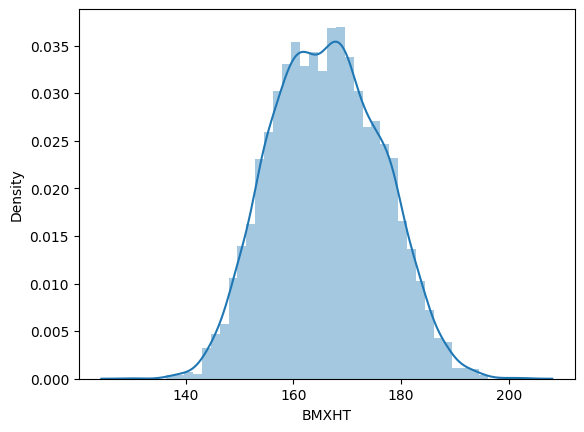

In [20]:
# insert your code here
sns.distplot(da["BMXHT"].dropna())

/var/folders/4t/lhzjgp_j7ml02nfn_hhdv1mh0000gn/T/ipykernel_63958/126294614.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(da["BMXHT"].dropna(), bins=10)


<Axes: xlabel='BMXHT', ylabel='Density'>

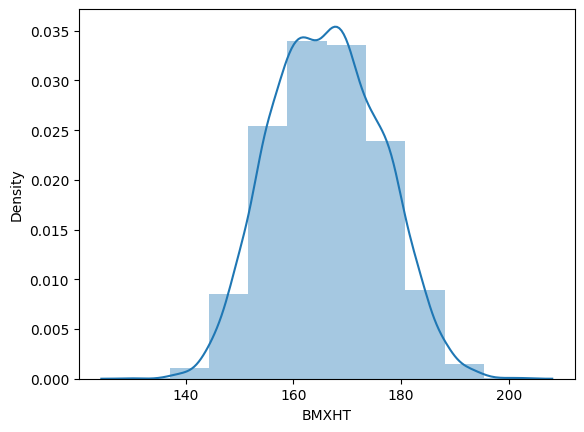

In [21]:
sns.distplot(da["BMXHT"].dropna(), bins=10)

/var/folders/4t/lhzjgp_j7ml02nfn_hhdv1mh0000gn/T/ipykernel_63958/3563571196.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(da["BMXHT"].dropna(), bins=1000)


<Axes: xlabel='BMXHT', ylabel='Density'>

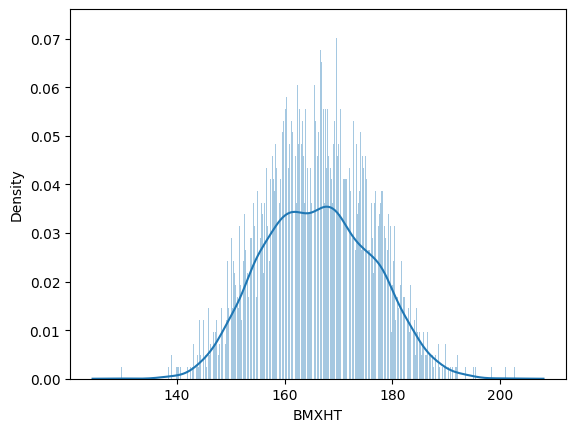

In [22]:
sns.distplot(da["BMXHT"].dropna(), bins=1000)

__Q3a.__ Use the `bins` argument to [distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) to produce histograms with different numbers of bins.  Assess whether the default value for this argument gives a meaningful result, and comment on what happens as the number of bins grows excessively large or excessively small. 

__Q3b.__ Make separate histograms for the heights of women and men, then make a side-by-side boxplot showing the heights of women and men.

/var/folders/4t/lhzjgp_j7ml02nfn_hhdv1mh0000gn/T/ipykernel_63958/2922846433.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(da.loc[da["RIAGENDRx"] == "Female", "BMXHT"].dropna())


<Axes: xlabel='BMXHT', ylabel='Density'>

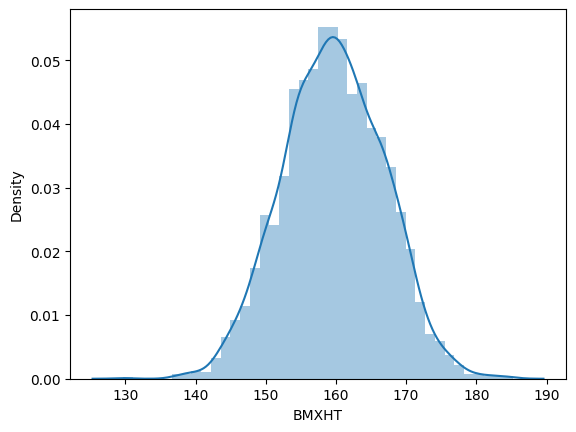

In [23]:
# insert your code here
sns.distplot(da.loc[da["RIAGENDRx"] == "Female", "BMXHT"].dropna())

/var/folders/4t/lhzjgp_j7ml02nfn_hhdv1mh0000gn/T/ipykernel_63958/1172612728.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(da.loc[da["RIAGENDRx"] == "Male", "BMXHT"].dropna())


<Axes: xlabel='BMXHT', ylabel='Density'>

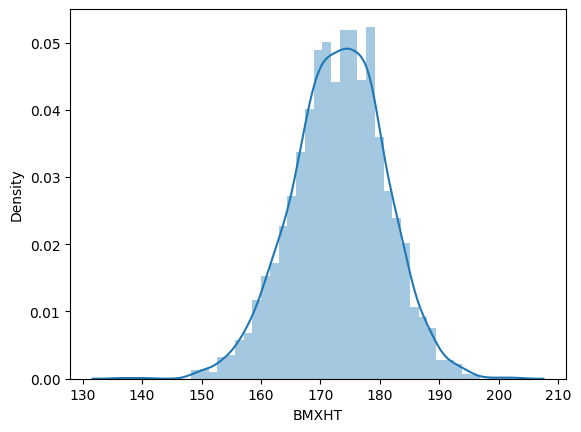

In [24]:
sns.distplot(da.loc[da["RIAGENDRx"] == "Male", "BMXHT"].dropna())

<Axes: xlabel='BMXHT', ylabel='RIAGENDRx'>

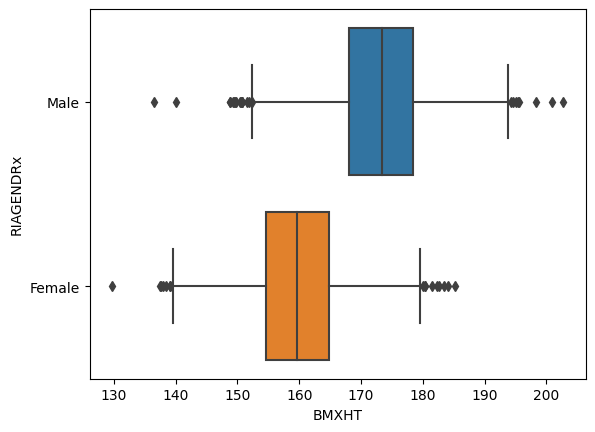

In [25]:
sns.boxplot(x="BMXHT", y="RIAGENDRx", data=da)

__Q3c.__ Comment on what features, if any are not represented clearly in the boxplots, and what features, if any, are easier to see in the boxplots than in the histograms.

## Question 4

Make a boxplot showing the distribution of within-subject differences between the first and second systolic blood pressure measurents ([BPXSY1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXSY1) and [BPXSY2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXSY2)).

<Axes: >

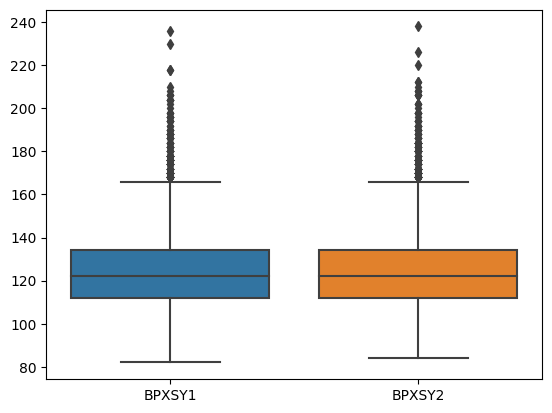

In [26]:
# insert your code here
sns.boxplot(data=da.loc[:, ["BPXSY1", "BPXSY2"]])

__Q4a.__ What proportion of the subjects have a lower SBP on the second reading compared to the first?

In [27]:
# insert your code here

__Q4b.__ Make side-by-side boxplots of the two systolic blood pressure variables.

In [28]:
# insert your code here

__Q4c.__ Comment on the variation within either the first or second systolic blood pressure measurements, and the variation in the within-subject differences between the first and second systolic blood pressure measurements.

## Question 5

Construct a frequency table of household sizes for people within each educational attainment category (the relevant variable is [DMDEDUC2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDEDUC2)).  Convert the frequencies to proportions.

In [29]:
da["DMDEDUC2x"] = da.DMDEDUC2.replace({1: "<9", 2: "9-11", 3: "HS/GED", 4: "Some college/AA", 5: "College", 
                                       7: "Refused", 9: "Don't know"})
da["DMDEDUC2x"].head()

0            College
1             HS/GED
2             HS/GED
3            College
4    Some college/AA
Name: DMDEDUC2x, dtype: object

<Axes: xlabel='DMDHHSIZ', ylabel='DMDEDUC2x'>

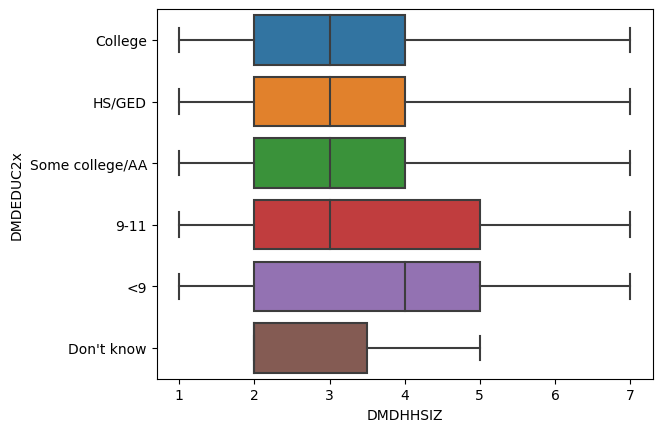

In [30]:
# insert your code here
sns.boxplot(x="DMDHHSIZ", y="DMDEDUC2x", data=da)

__Q5a.__ Comment on any major differences among the distributions.

__Q5b.__ Restrict the sample to people between 30 and 40 years of age.  Then calculate the median household size for women and men within each level of educational attainment.

<Axes: xlabel='DMDHHSIZ', ylabel='DMDEDUC2x'>

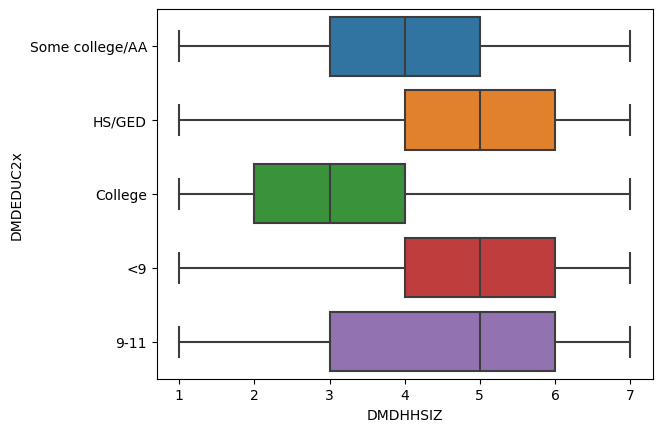

In [31]:
# insert your code here
women = da.loc[(da["RIAGENDRx"] == "Female") & (da["RIDAGEYR"] >= 30) & (da["RIDAGEYR"] <= 40)]
sns.boxplot(x="DMDHHSIZ", y="DMDEDUC2x", data=women)

<Axes: xlabel='DMDHHSIZ', ylabel='DMDEDUC2x'>

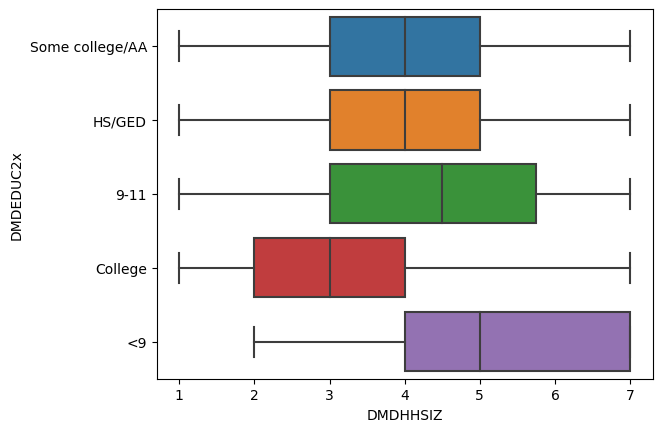

In [32]:
men = da.loc[(da["RIAGENDRx"] == "Male") & (da["RIDAGEYR"] >= 30) & (da["RIDAGEYR"] <= 40)]
sns.boxplot(x="DMDHHSIZ", y="DMDEDUC2x", data=men)

In [33]:
women[women["DMDEDUC2x"] == "9-11"]["DMDHHSIZ"].median()

5.0

In [34]:
women[women["DMDEDUC2x"] == "College"]["DMDHHSIZ"].median()

3.0

## Question 6

The participants can be clustered into "maked variance units" (MVU) based on every combination of the variables [SDMVSTRA](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#SDMVSTRA) and [SDMVPSU](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#SDMVPSU).  Calculate the mean age ([RIDAGEYR](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIDAGEYR)), height ([BMXHT](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXHT)), and BMI ([BMXBMI](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXBMI)) for each gender ([RIAGENDR](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIAGENDR)), within each MVU, and report the ratio between the largest and smallest mean (e.g. for height) across the MVUs.

In [35]:
# insert your code here

__Q6a.__ Comment on the extent to which mean age, height, and BMI vary among the MVUs.

__Q6b.__ Calculate the inter-quartile range (IQR) for age, height, and BMI for each gender and each MVU.  Report the ratio between the largest and smalles IQR across the MVUs.

In [36]:
# insert your code here

__Q6c.__ Comment on the extent to which the IQR for age, height, and BMI vary among the MVUs.

# Python Assessment: Univariate Analysis

In [37]:
len(da["BPXSY2"])

5735

In [38]:
s = da["BPXSY2"].dropna().copy()
len(s)

5535

In [39]:
s.median()

122.0

In [40]:
s.mean()

124.78301716350497

In [41]:
s.std()

18.527011720294997

In [42]:
s.max()

238.0

In [43]:
s.describe()

count    5535.000000
mean      124.783017
std        18.527012
min        84.000000
25%       112.000000
50%       122.000000
75%       134.000000
max       238.000000
Name: BPXSY2, dtype: float64

/var/folders/4t/lhzjgp_j7ml02nfn_hhdv1mh0000gn/T/ipykernel_63958/2056575581.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=s)


<Axes: xlabel='BPXSY2', ylabel='Density'>

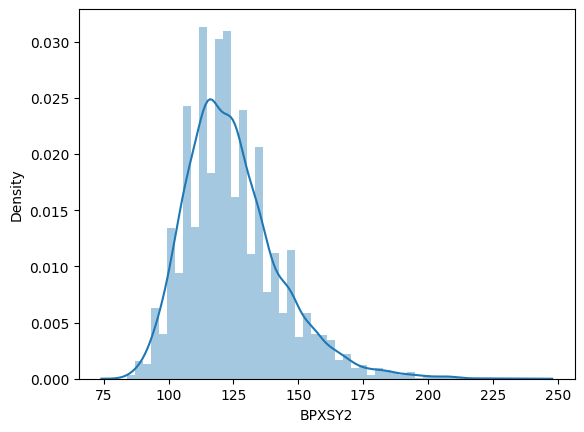

In [44]:
sns.distplot(a=s)

/var/folders/4t/lhzjgp_j7ml02nfn_hhdv1mh0000gn/T/ipykernel_63958/2296258128.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=s).set(title="Histogram of s")


[Text(0.5, 1.0, 'Histogram of s')]

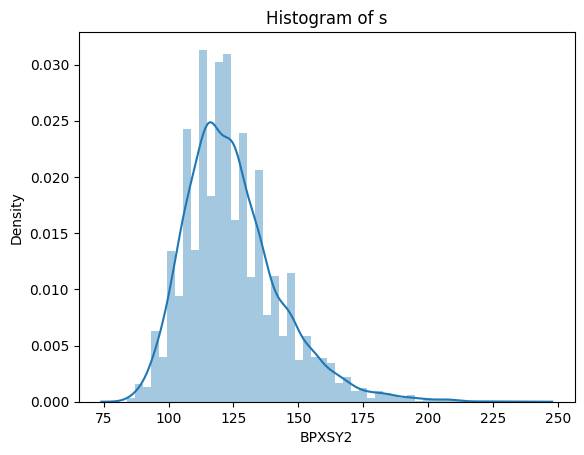

In [45]:
sns.distplot(a=s).set(title="Histogram of s")

/var/folders/4t/lhzjgp_j7ml02nfn_hhdv1mh0000gn/T/ipykernel_63958/1781893823.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(s)


<Axes: xlabel='BPXSY2', ylabel='Density'>

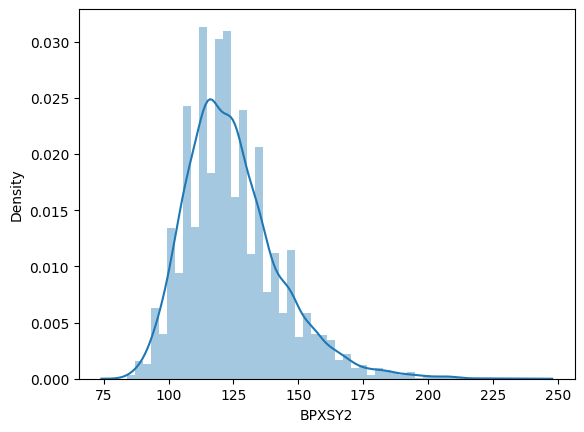

In [46]:
sns.distplot(s)

In [47]:
da.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210,RIAGENDRx,DMDEDUC2x
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0,Male,College
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN,Male,HS/GED
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0,Male,HS/GED
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0,Female,College
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0,Female,Some college/AA


In [48]:
da.head(2)

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210,RIAGENDRx,DMDEDUC2x
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0,Male,College
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN,Male,HS/GED
